# Tarea 12 Adán Rubiol


Ejercicio 1. Método de Euler implícito

In [3]:
listt=linspace(0,8,101)#se crea la lista con el intervalo de tiempo con h=0.08

101-element LinSpace{Float64}:
 0.0,0.08,0.16,0.24,0.32,0.4,0.48,0.56,…,7.44,7.52,7.6,7.68,7.76,7.84,7.92,8.0

In [47]:
listT=linspace(0,8,501)#se crea la lista con el intervalo de tiempo con h=0.008

501-element LinSpace{Float64}:
 0.0,0.016,0.032,0.048,0.064,0.08,0.096,…,7.92,7.936,7.952,7.968,7.984,8.0

In [7]:
using PyPlot

In [6]:
function f(t,x)#se crea la función dada en la ec diferencial
    return -x
end

f (generic function with 1 method)

In [7]:
function eulerimplicito(f,x0,listt)#se crea la función que toma como entrada la función de la Ec. diferencial, 
    listx=zeros(length(listt)) #la condición inicial x0  y la lista con el tiempo t
    h=listt[2]-listt[1]#se calcula el tamaño del paso h
    listx[1]=x0 #se inicia la lista de los valores de x con x0
    x=x0#iniciamos la variable x en x0
    xk=x0#una primera aproximación de xk es x0
for i in 1:length(listt)-1#en este for se define cada  función y su derivada a usar en el método de Newton, tantas como
    listxk=zeros(100)#los elementos de la lista en t menos 1
    g(x)= x-xk-h* f(listt[i+1],x)# se define la función g a usar en M. de Newton
    g´(x)=1 - (f(listt[i+1],x+h)-f(listt[i+1],x))#se calcula la derivada de g como g´=(f(t,x+h)-f(t,x))/h
for l in 1:100#el ciclo for para obtener el primer valor de x para una función g dada
    x=x-g(x)/g´(x)#m. de Newton
    listxk[l]=x#se guarda cada valor de x en listxk
end 
    listx[i+1]=listxk[100]#guardamos el último valor obtenido por el m. de Newton 
                           #como un el elemento x_i+1 de la lista de x para una g(x) dada
    xk=listxk[100]        #asignamos el  valor de la raiz obtenida a la  constante xk_i+1
    x=listxk[100]        #asignamos en valor de la raiz como primera aproximación de la siguiente raiz de la función
end              #g(t_i+1,x)
return listt, listx #se regresa las listas con la solución numérica de x y la lista de tiempo original
end

eulerimplicito (generic function with 1 method)

In [8]:
(listt,listx)= eulerimplicito(f,1,listt)#asignamos los valores de listt y listx

(linspace(0.0,8.0,101),[1.0,0.925926,0.857339,0.793832,0.73503,0.680583,0.63017,0.58349,0.540269,0.500249  …  0.000908737,0.000841423,0.000779096,0.000721385,0.000667949,0.000618471,0.000572659,0.000530239,0.000490962,0.000454595])

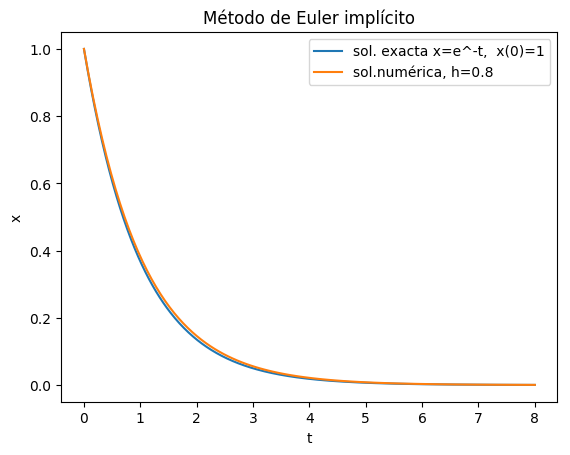

PyObject <matplotlib.legend.Legend object at 0x7fbbc840a550>

In [9]:
t=listT
x=exp.(-t)#calculamos la solución exacta 
plot(t,x,label="sol. exacta x=e^-t,  x(0)=1")
plot(listt,listx,label="sol.numérica, h=0.8")
xlabel("t");ylabel("x")
title("Método de Euler implícito")
legend()

Ejercicio 2. Método del punto medio

In [10]:
function regla_punto_medio(f,x0,listt)#se crea una función que toma como input la función de la ecuación diferencial
    #la condición inicial, y la lista de particiones de tiempo
    listx=zeros(length(listt))#creamos la lista donde se guardará los valores de x
    h=listt[2]-listt[1]#calculamos el tamaño del paso h
    x=x0#inicializamos con el valor de la condición inicial
    t=listt[1]#iniciamos t con el primer valor de listt 
    listx[1]=x0#iniciamos con el valor de la condición inicial en la lista de x
for i in 1:length(listt)-1#en este for se calcula el m. de punto medio para cada valor de listx
    x=x+h*f(t+ h/2,x+(h/2)*f(t,x))#se asigna a x con m. de euler tomando la aproximación de punto medio
    listx[i+1]=x#asignamos el valor de x a cada elemento de la lista de x
    x=listx[i+1]#asignamos el elemento x i+1 a l valor de x
    t=listt[i+1]#asignamos a t el elemento i+1 de t
end
return listt, listx# regresamos las lista de t y x
end

regla_punto_medio (generic function with 1 method)

In [11]:
(T1,X1)=regla_punto_medio(f,1,listt)#se asigna los valores de salida a T1, X1

(linspace(0.0,8.0,101),[1.0,0.9232,0.852298,0.786842,0.726412,0.670624,0.61912,0.571572,0.527675,0.487149  …  0.000694892,0.000641524,0.000592255,0.00054677,0.000504778,0.000466011,0.000430222,0.000397181,0.000366677,0.000338516])

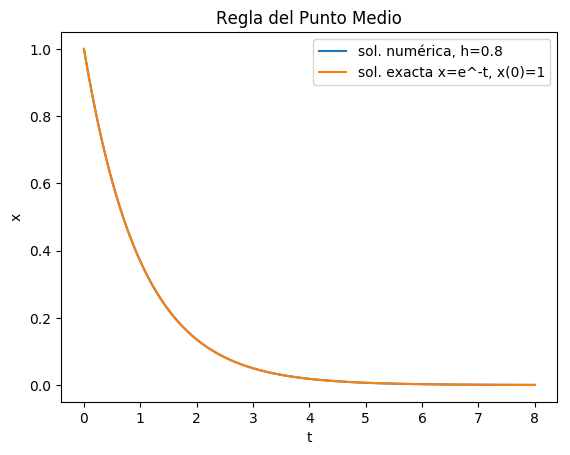

PyObject <matplotlib.legend.Legend object at 0x7fbbc840ab10>

In [12]:
plot(T1,X1,label="sol. numérica, h=0.8")
plot(t,x,label="sol. exacta x=e^-t, x(0)=1")
xlabel("t");ylabel("x")
title("Regla del Punto Medio")
legend()

Ejercicio 3. Método de Runge-Kutta de orden 4

In [13]:
function RK4(f,x0,listt)#se crea una función que toma como input la función f de la ec. diferencial, la condición inicial
    #x0 y la lista de particiones de t
    listx=zeros(length(listt))#creamos la lista donde se guardará los valores de x
    h=listt[2]-listt[1]#calculamos el tamaño del paso h
    x=x0#inicializamos con el valor de la condición inicial
    t=listt[1]#iniciamos t con el primer valor de listt
    listx[1]=x0#iniciamos con el valor de la condición inicial en la lista de x
for i in 1:length(listt)-1#en este for se calcula el m. de Runge-Kutta para cada valor de listx
    k1=f(t,x)#se definen todos los coeficientes del método
    k2=f(t+h/2,x+((h/2)*k1))
    k3=f(t+h/2,x+((h/2)*k2))
    k4=f(t+h,x+h*k3)
x=x+ (h/6)*(k1+2*k2+2*k3+k4)#se asigna el nuevo valor de x deacuerdo a la regla de correspondencia del método
   listx[i+1]=x#se asigna x al elemento i+1 de la lista de x
   t=listt[i+1]#se asigna el elemento i+1 de t al valor t
end
return listt, listx#se regresan las listas listt y listx
end

RK4 (generic function with 1 method)

In [14]:
(T2,X2)=RK4(f,1,listt)#se asigna los valores de salida a T2, X2

(linspace(0.0,8.0,101),[1.0,0.923116,0.852144,0.786628,0.726149,0.67032,0.618784,0.571209,0.527293,0.486752  …  0.000689187,0.0006362,0.000587287,0.000542134,0.000500453,0.000461976,0.000426458,0.00039367,0.000363403,0.000335464])

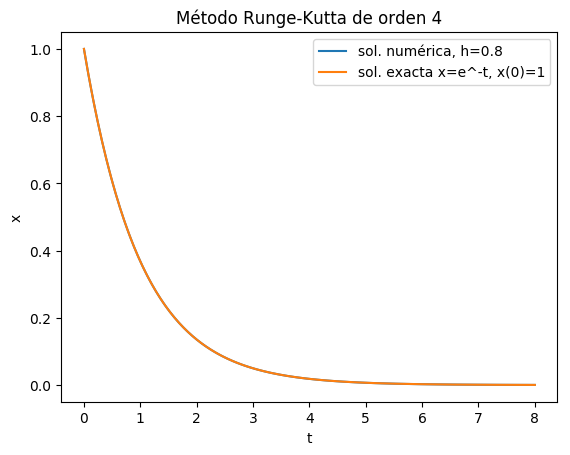

PyObject <matplotlib.legend.Legend object at 0x7fbbc833bdd0>

In [15]:
plot(T2,X2,label="sol. numérica, h=0.8")
plot(t,x,label="sol. exacta x=e^-t, x(0)=1")
xlabel("t");ylabel("x")
title("Método Runge-Kutta de orden 4")
legend()


Ejercicio 4. Comparación con Ej.1 de Tarea 11

In [16]:
function F(t,x)#definimos la función del ejercicio 1 de la tarea 11
    return -2.5*x
end

F (generic function with 1 method)

In [17]:
listt1=linspace(0,8,9)#creamos una lista con un taaño de h=1


9-element LinSpace{Float64}:
 0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0

In [18]:
listt2=linspace(0,8,17)#creamos una lista con un h=0.5

17-element LinSpace{Float64}:
 0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0

In [19]:
listt3=linspace(0,8,41)#creamos una lista con h=0.2

41-element LinSpace{Float64}:
 0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,…,6.4,6.6,6.8,7.0,7.2,7.4,7.6,7.8,8.0

In [20]:
listt4=linspace(0,8,801)#creamos una lista con h=0.01

801-element LinSpace{Float64}:
 0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,…,7.94,7.95,7.96,7.97,7.98,7.99,8.0

In [21]:
(t1,x1)= eulerimplicito(F,1,listt2)
(t2,x2)= eulerimplicito(F,1,listt3)
(t3,x3)= eulerimplicito(F,1,listt4)
t=listT
X=exp.(-2.5*t)

501-element Array{Float64,1}:
 1.0       
 0.960789  
 0.923116  
 0.88692   
 0.852144  
 0.818731  
 0.786628  
 0.755784  
 0.726149  
 0.697676  
 0.67032   
 0.644036  
 0.618783  
 ⋮         
 3.20037e-9
 3.07488e-9
 2.95431e-9
 2.83847e-9
 2.72717e-9
 2.62024e-9
 2.5175e-9 
 2.41879e-9
 2.32394e-9
 2.23282e-9
 2.14527e-9
 2.06115e-9

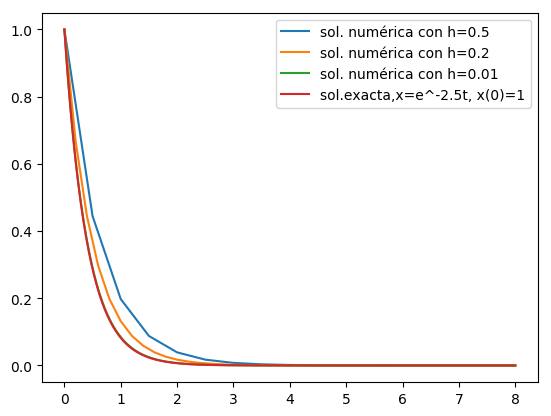

PyObject <matplotlib.legend.Legend object at 0x7fbbc817a4d0>

In [22]:
plot(t1,x1,label="sol. numérica con h=0.5")
plot(t2,x2,label="sol. numérica con h=0.2")
plot(t3,x3,label="sol. numérica con h=0.01")
plot(t,X,label="sol.exacta,x=e^-2.5t, x(0)=1")
legend()

In [23]:
(t4,x4)= eulerimplicito(F,2,listt2)
(t5,x5)= eulerimplicito(F,2,listt3)
(t6,x6)= eulerimplicito(F,2,listt4)
Y=2*exp.(-2.5*t)

501-element Array{Float64,1}:
 2.0       
 1.92158   
 1.84623   
 1.77384   
 1.70429   
 1.63746   
 1.57326   
 1.51157   
 1.4523    
 1.39535   
 1.34064   
 1.28807   
 1.23757   
 ⋮         
 6.40074e-9
 6.14976e-9
 5.90862e-9
 5.67694e-9
 5.45435e-9
 5.24048e-9
 5.035e-9  
 4.83757e-9
 4.64789e-9
 4.46564e-9
 4.29054e-9
 4.12231e-9

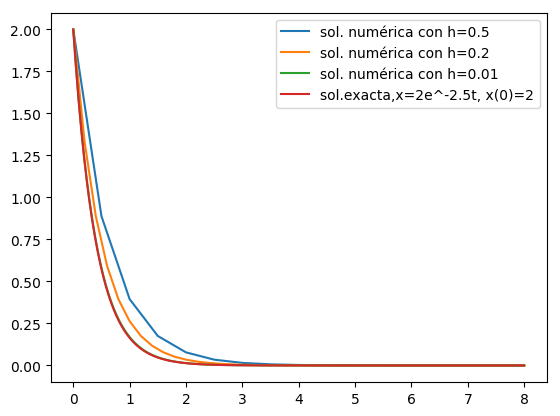

PyObject <matplotlib.legend.Legend object at 0x7fbbc80711d0>

In [24]:
plot(t4,x4,label="sol. numérica con h=0.5")
plot(t5,x5,label="sol. numérica con h=0.2")
plot(t6,x6,label="sol. numérica con h=0.01")
plot(t,Y,label="sol.exacta,x=2e^-2.5t, x(0)=2")
legend()

In [25]:
(t7,x7)= eulerimplicito(F,1,listt1)

(linspace(0.0,8.0,9),[1.0,0.285714,0.0816327,0.0233236,0.00666389,0.00190397,0.000543991,0.000155426,4.44074e-5])

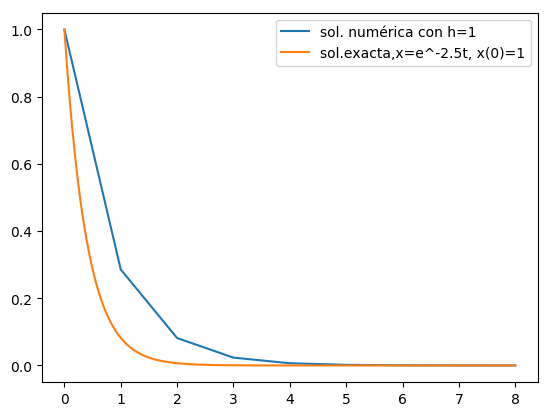

PyObject <matplotlib.legend.Legend object at 0x7fbbc7f68610>

In [26]:
plot(t7,x7,label="sol. numérica con h=1")
plot(t,X,label="sol.exacta,x=e^-2.5t, x(0)=1")
legend()

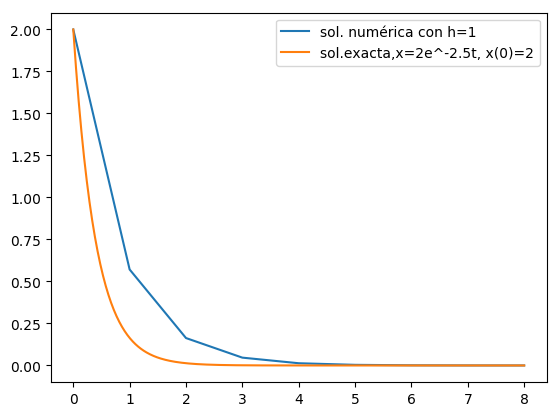

PyObject <matplotlib.legend.Legend object at 0x7fbbc7e48110>

In [27]:
(t8,x8)= eulerimplicito(F,2,listt1)
plot(t8,x8,label="sol. numérica con h=1")
plot(t,Y,label="sol.exacta,x=2e^-2.5t, x(0)=2")
legend()

Ejercicio 5. Comparación de punto medio y de Runge-Kutta

In [28]:
function H(t,x)
return (2x-18t)/(1+t)
end#creamos la funcción dada en la ec diferencial


H (generic function with 1 method)

In [29]:
(t9,x9)=regla_punto_medio(H,4,listt1)
t=listT
y=4+8t.-5t.^2#calculamos la función solución esperada

501-element Array{Float64,1}:
    4.0    
    4.12672
    4.25088
    4.37248
    4.49152
    4.608  
    4.72192
    4.83328
    4.94208
    5.04832
    5.152  
    5.25312
    5.35168
    ⋮      
 -239.483  
 -240.608  
 -241.736  
 -242.866  
 -243.999  
 -245.134  
 -246.272  
 -247.412  
 -248.556  
 -249.701  
 -250.849  
 -252.0    

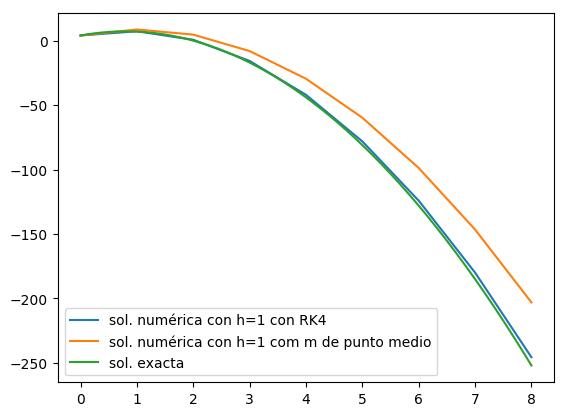

PyObject <matplotlib.legend.Legend object at 0x7fbbbcd78950>

In [165]:
(t10,x10)=RK4(H,4,listt1)
plot(t10,x10,label="sol. numérica con h=1 con RK4")
plot(t9,x9,label="sol. numérica con h=1 com m de punto medio")
plot(t,y,label="sol. exacta")
legend()

In [32]:
function F(x,u)#se define la función que será la primera entrada del vector F
return u
end

F (generic function with 1 method)

In [33]:
function G(x,u)#se define la función que será la segunda entrada del vector F
return -x
end

G (generic function with 1 method)

In [178]:
function meulervec(F,G,x0,u0,listas)#se implemeta el método del Euler para sistemas de 2 dimensiones, con input, 
#las funciones componentes del sistema F, G las condiciones iniciales, x(0), u(0=x'(0) y la lista con la partición de
# del tiempo t
listx=zeros(length(listas))# se crean las listas de  x y u  con ceros donde se guardarán los datos, del mismo tamaño
# que la lista de t
listu=zeros(length(listas))
    h=(listas[end]-listas[1])/(length(listas)-1)#se calcula el tamaño del paso el t
listx[1]=x0 #se inicia los valores de x y u de las listas con las condiciones dadas en el input
listu[1]=u0
t=listas[1]#se asigna a t el primer elemento de la lista de t
x=x0#se asigna los valores de x y u con los dados en el input
u=u0
for i in 2:length(listas)#en este for se calcula el método de Euler para cada componente del vector asignado valores desde
        #desde el elemento 2 hasta el último de la lista de t
        x=x+(h*F(x,u))
        listx[i]=x #se asigna cada elemento del método de euler a la lista x
        u=u+(h*G(x,u))
        listu[i]=u#se asigna cada elemento del método de euler a la lista u
        t=listas[i]
end
return (listx,listu)  #se regresa la lista de x y u
end

meulervec (generic function with 1 method)

In [179]:
lista=linspace(0,8,81)

81-element LinSpace{Float64}:
 0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,…,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,8.0

In [180]:
(listx,listu)=meulervec(F,G,0,1,lista)

([0.0,0.1,0.199,0.29601,0.39006,0.480209,0.565556,0.645248,0.718487,0.784542  …  0.731909,0.796488,0.853102,0.901185,0.940256,0.969925,0.989894,0.999964,1.00004,0.990106],[1.0,0.99,0.9701,0.940499,0.901493,0.853472,0.796916,0.732392,0.660543,0.582089  …  0.645789,0.566141,0.48083,0.390712,0.296686,0.199694,0.100704,0.000708001,-0.0992955,-0.198306])

Ejercicio 7. Gráfica en el "espacio fase" por método de Euler

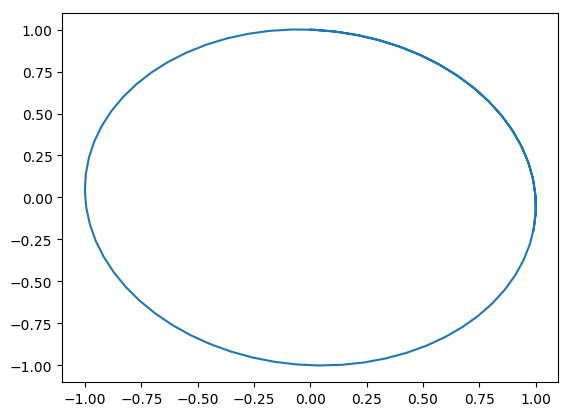

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fbbbcefc2d0>

In [181]:
plot(listx,listu)

In [1]:
function RK4vec(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
    for i in 2:length(list)
      t = i*h
    k1=f(t,x)#se definen todos los coeficientes del método
    k2=f(t+h/2,x+((h/2)*k1))
    k3=f(t+h/2,x+((h/2)*k2))
    k4=f(t+h,x+h*k3)
    x=x+ (h/6)*(k1+2*k2+2*k3+k4)
    push!(listx,x) 
     end
     return listx
end

RK4vec (generic function with 1 method)

In [2]:
f(t,x) = [x[2], -x[1]]

f (generic function with 1 method)

In [3]:
list=0:0.1:8;
vec=RK4vec(f,list,[0,1]);


In [4]:
listx1=map(x->x[1],vec);
listx2=map(x->x[2],vec);

In [186]:
using PyPlot

Gráfica en el espacio fase del método de Runde Kutta

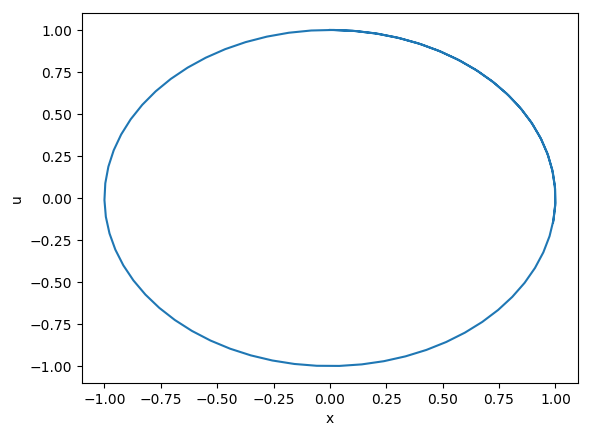

In [187]:
xlabel("x");ylabel("u")
plot(listx1,listx2);

Ejercicio 6. Energia total del oscilador armónico, obtenida de euler explícito y Runge Kutta vectorial

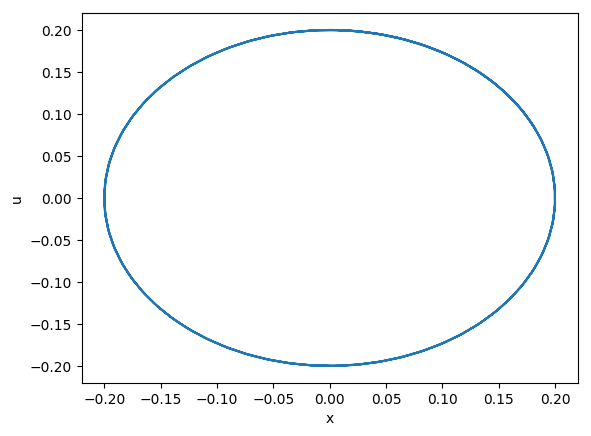

In [65]:
g(t,x) = [x[2], -x[1]]
list=0:0.1:20;
vec=RK4vec(g,list,[0,0.2]);
xlabel("x");ylabel("u");
listx3=map(x->x[1],vec);
listx4=map(x->x[2],vec);
plot(listx3,listx4);

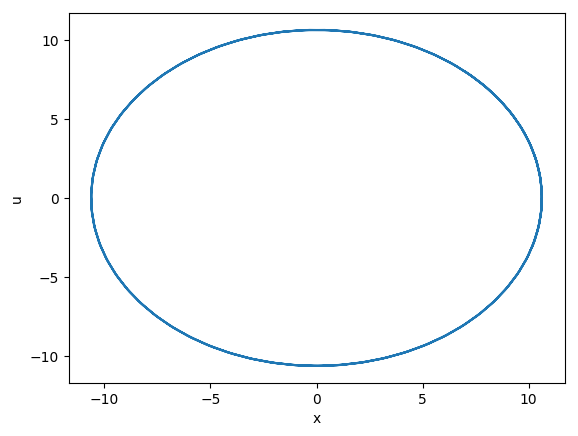

In [66]:
g(t,x) = [x[2], -x[1]]
list=0:0.1:20;
vec=RK4vec(g,list,[7,8]);
xlabel("x");ylabel("u");
listx3=map(x->x[1],vec);
listx4=map(x->x[2],vec);
plot(listx3,listx4);

In [188]:
x=listx#Calculamos la energia obtenida con el método de Euler implicito
u=listu
E=0.5((x).^2+(u).^2)
x2=listx2
x1=listx1
e=0.5((x1).^2+(x2).^2)

81-element Array{Float64,1}:
 0.5     
 0.49505 
 0.490348
 0.48608 
 0.482418
 0.479508
 0.477465
 0.476371
 0.47627 
 0.477166
 0.479023
 0.481767
 0.485289
 ⋮       
 0.477176
 0.476273
 0.476367
 0.477454
 0.47949 
 0.482395
 0.486052
 0.490316
 0.495016
 0.499965
 0.504965
 0.509817

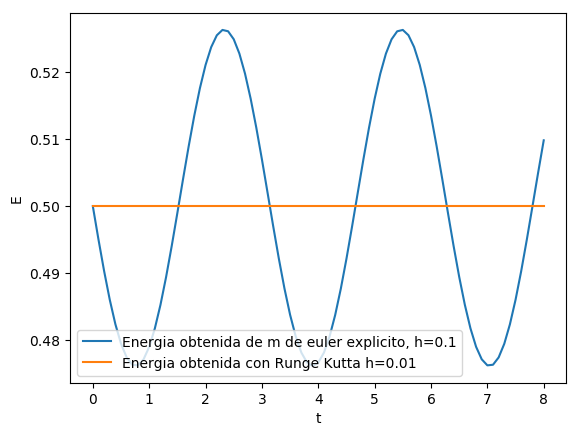

PyObject <matplotlib.legend.Legend object at 0x7fbbbc874190>

In [194]:
plot(lista,E,label="Energia obtenida de m de euler explicito, h=0.1")
plot(list,e,label="Energia obtenida con Runge Kutta h=0.01")
xlabel("t");ylabel("E")
legend()